In [2]:
import os
import sys
sys.path.append("../..")
import phage_init

In [3]:
#load the saved matrices
import pickle
train_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"train_x_data2.p"), "rb" ) )
test_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"test_x_data2.p"), "rb" ) )
train_Y=pickle.load(open( os.path.join(phage_init.data_dir,"train_y_data2.p"), "rb" ) )
test_Y=pickle.load(open( os.path.join(phage_init.data_dir,"test_y_data2.p"), "rb" ) )
mean_total=pickle.load(open( os.path.join(phage_init.data_dir,"mean_data2.p"), "rb" ) )
std_total=pickle.load(open( os.path.join(phage_init.data_dir,"std_data2.p"), "rb" ) )

In [4]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [5]:

train_X =train_X_total
test_X  =test_X_total
#train_X=di_sc_train
#test_X=di_sc_test
model_name='di_p_data2.h5'
print(train_X.shape)
print(test_X.shape)

(50000, 408)
(7774, 408)


In [6]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 979397592511296539
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8083202537137940765
physical_device_desc: "device: XLA_CPU device"
]


In [7]:
print(train_X.shape[1])
f_num=train_X.shape[1]


408


In [12]:
from sklearn.model_selection import StratifiedKFold

In [18]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=43)
train_Y_index = train_Y.argmax(axis=1)
cvscores = []
for train, test in kfold.split(train_X, train_Y_index):
    #model with 2 leyers of 100 LSTM neurons
    train_YY = numpy.eye(10)[train_Y_index[train]]
    test_YY  = numpy.eye(10)[train_Y_index[test]]
    model = Sequential()
    opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.add(Dense(f_num, input_dim=f_num, kernel_initializer='random_uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(200,activation='relu'))
    #model.add(Dense(200,activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(200,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(train_X[train], train_YY, epochs=30, batch_size=3000, verbose=1)
    scores = model.evaluate(train_X[test], test_YY, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))   

Epoch 1/30
44997/44997 [==============================] - 2s 39us/step - loss: 1.5755 - acc: 0.5051
Epoch 2/30
44997/44997 [==============================] - 1s 17us/step - loss: 0.8199 - acc: 0.7634
Epoch 3/30
44997/44997 [==============================] - 1s 17us/step - loss: 0.5953 - acc: 0.8245
Epoch 4/30
44997/44997 [==============================] - 1s 17us/step - loss: 0.4833 - acc: 0.8566
Epoch 5/30
44997/44997 [==============================] - 1s 17us/step - loss: 0.4127 - acc: 0.8771
Epoch 6/30
44997/44997 [==============================] - 1s 17us/step - loss: 0.3600 - acc: 0.8926
Epoch 7/30
44997/44997 [==============================] - 1s 17us/step - loss: 0.3170 - acc: 0.9058
Epoch 8/30
44997/44997 [==============================] - 1s 17us/step - loss: 0.2790 - acc: 0.9149
Epoch 9/30
44997/44997 [==============================] - 1s 17us/step - loss: 0.2480 - acc: 0.9249
Epoch 10/30
44997/44997 [==============================] - 1s 17us/step - loss: 0.2202 - acc: 0.9325

44999/44999 [==============================] - 1s 17us/step - loss: 0.0791 - acc: 0.9740
Epoch 23/30
44999/44999 [==============================] - 1s 17us/step - loss: 0.0728 - acc: 0.9763
Epoch 24/30
44999/44999 [==============================] - 1s 17us/step - loss: 0.0713 - acc: 0.9766
Epoch 25/30
44999/44999 [==============================] - 1s 17us/step - loss: 0.0673 - acc: 0.9780
Epoch 26/30
44999/44999 [==============================] - 1s 17us/step - loss: 0.0650 - acc: 0.9782
Epoch 27/30
44999/44999 [==============================] - 1s 17us/step - loss: 0.0593 - acc: 0.9803
Epoch 28/30
44999/44999 [==============================] - 1s 17us/step - loss: 0.0612 - acc: 0.9803
Epoch 29/30
44999/44999 [==============================] - 1s 18us/step - loss: 0.0554 - acc: 0.9820
Epoch 30/30
44999/44999 [==============================] - 1s 17us/step - loss: 0.0533 - acc: 0.9824
acc: 92.46%
Epoch 1/30
44999/44999 [==============================] - 2s 43us/step - loss: 1.5667 - acc

45000/45000 [==============================] - 1s 17us/step - loss: 0.1561 - acc: 0.9505
Epoch 14/30
45000/45000 [==============================] - 1s 18us/step - loss: 0.1428 - acc: 0.9559
Epoch 15/30
45000/45000 [==============================] - 1s 17us/step - loss: 0.1292 - acc: 0.9586
Epoch 16/30
45000/45000 [==============================] - 1s 17us/step - loss: 0.1181 - acc: 0.9626
Epoch 17/30
45000/45000 [==============================] - 1s 19us/step - loss: 0.1077 - acc: 0.9660
Epoch 18/30
45000/45000 [==============================] - 1s 17us/step - loss: 0.0982 - acc: 0.9692
Epoch 19/30
45000/45000 [==============================] - 1s 17us/step - loss: 0.0930 - acc: 0.9706
Epoch 20/30
45000/45000 [==============================] - 1s 17us/step - loss: 0.0862 - acc: 0.9720
Epoch 21/30
45000/45000 [==============================] - 1s 17us/step - loss: 0.0829 - acc: 0.9726
Epoch 22/30
45000/45000 [==============================] - 1s 18us/step - loss: 0.0766 - acc: 0.9747
Ep

45003/45003 [==============================] - 1s 18us/step - loss: 0.5403 - acc: 0.8394
Epoch 5/30
45003/45003 [==============================] - 1s 18us/step - loss: 0.5011 - acc: 0.8511
Epoch 6/30
45003/45003 [==============================] - 1s 18us/step - loss: 0.4690 - acc: 0.8602
Epoch 7/30
45003/45003 [==============================] - 1s 18us/step - loss: 0.4300 - acc: 0.8711
Epoch 8/30
45003/45003 [==============================] - 1s 18us/step - loss: 0.3943 - acc: 0.8812
Epoch 9/30
45003/45003 [==============================] - 1s 18us/step - loss: 0.3750 - acc: 0.8856
Epoch 10/30
45003/45003 [==============================] - 1s 17us/step - loss: 0.3485 - acc: 0.8940
Epoch 11/30
45003/45003 [==============================] - 1s 17us/step - loss: 0.3743 - acc: 0.8865
Epoch 12/30
45003/45003 [==============================] - 1s 18us/step - loss: 0.3475 - acc: 0.8942
Epoch 13/30
45003/45003 [==============================] - 1s 18us/step - loss: 0.3094 - acc: 0.9042
Epoch 1

In [15]:
kfold.split(train_X, train_Y)

<generator object _BaseKFold.split at 0x7fa65023aaf0>

In [8]:
#model with 2 leyers of 100 LSTM neurons
model = Sequential()
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(f_num, input_dim=f_num, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 408)               166872    
_________________________________________________________________
dropout_1 (Dropout)          (None, 408)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               81800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [10]:
model.fit(train_X, train_Y, epochs=30,verbose=1, batch_size=3000)

Epoch 1/30
50000/50000 [==============================] - 1s 17us/step - loss: 0.0525 - acc: 0.9826
Epoch 2/30
50000/50000 [==============================] - 1s 17us/step - loss: 0.0506 - acc: 0.9832
Epoch 3/30
50000/50000 [==============================] - 1s 17us/step - loss: 0.0489 - acc: 0.9832
Epoch 4/30
50000/50000 [==============================] - 1s 18us/step - loss: 0.0466 - acc: 0.9848
Epoch 5/30
50000/50000 [==============================] - 1s 17us/step - loss: 0.0460 - acc: 0.9844
Epoch 6/30
50000/50000 [==============================] - 1s 17us/step - loss: 0.0434 - acc: 0.9853
Epoch 7/30
50000/50000 [==============================] - 1s 17us/step - loss: 0.0431 - acc: 0.9851
Epoch 8/30
50000/50000 [==============================] - 1s 17us/step - loss: 0.0422 - acc: 0.9863
Epoch 9/30
50000/50000 [==============================] - 1s 17us/step - loss: 0.0415 - acc: 0.9867
Epoch 10/30
50000/50000 [==============================] - 1s 17us/step - loss: 0.0421 - acc: 0.9858

In [11]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7774/7774 [==============================] - 1s 92us/step
Accuracy: 91.36%


In [11]:
#you can save the as a file so you dont have to train it every time
#model.save( os.path.join(phage_init.model_dir,model_name))

In [12]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.96      0.95      0.95      1833
     Minor capsid       0.76      0.62      0.68        91
        Baseplate       0.87      0.87      0.87       288
       Major tail       0.90      0.93      0.91       452
       Minor tail       0.89      0.83      0.86       546
           Portal       0.95      0.97      0.96      2474
       Tail fiber       0.74      0.72      0.73       401
       Tail shaft       0.94      0.92      0.93       626
           Collar       0.77      0.72      0.74       190
Head-Tail joining       0.91      0.95      0.93       873

        micro avg       0.92      0.92      0.92      7774
        macro avg       0.87      0.85      0.86      7774
     weighted avg       0.92      0.92      0.92      7774



In [13]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({5: 2474, 0: 1833, 9: 873, 7: 626, 4: 546, 3: 452, 6: 401, 2: 288, 8: 190, 1: 91})
[1833, 91, 288, 452, 546, 2474, 401, 626, 190, 873]



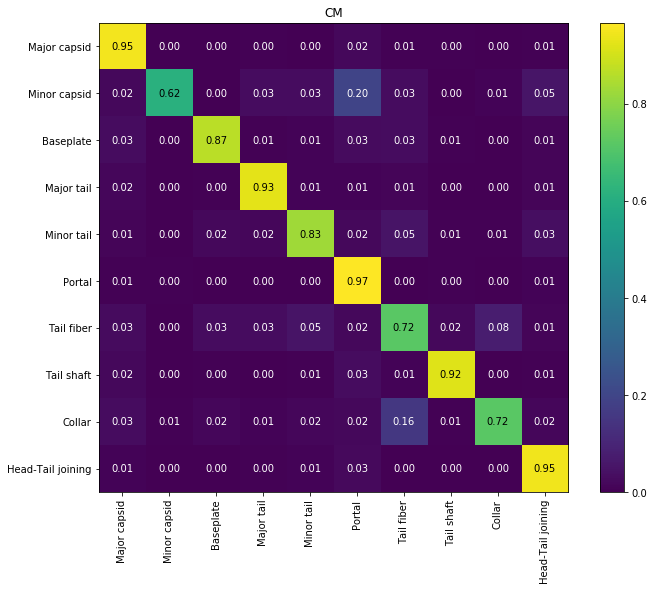

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
plt.show()
CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.8
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")
plt.savefig('bigger_better_ann.png',bbox_inches="tight")
plt.show()
